accuracy on testing set: 0.78
accuracy on testing set: 0.78
accuracy on testing set: 0.82
accuracy on testing set: 0.84
accuracy on testing set: 0.79
accuracy on testing set: 0.83


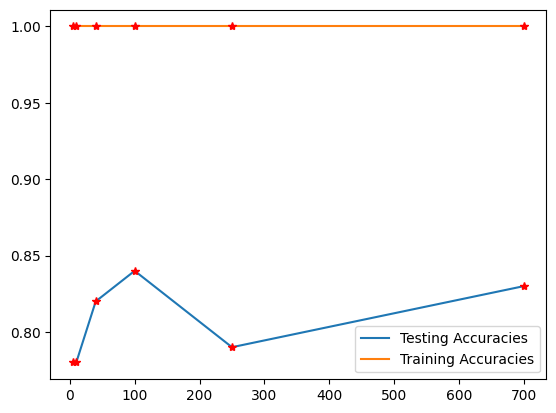

In [17]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, datasets, tree


data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

testingAccuracies = []
trainingAccuracies = []

featureNums = (5, 10, 40, 100, 250, 700)

target = df["class"]

variables = []

for i in df.columns:
    variables.append(i)


X = df.copy()
X = X.drop('class', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.30, stratify = target, random_state = 1)


for i in featureNums:

    selector = SelectKBest(mutual_info_classif, k = i)
    selector.fit(X_train, y_train)

    X_train_i = selector.transform(X_train)
    X_test_i = selector.transform(X_test)
    
    predictor = tree.DecisionTreeClassifier()
    predictor.fit(X_train_i, y_train)

    y_predTesting = predictor.predict(X_test_i)
    y_predTraining = predictor.predict(X_train_i)

    testingAccuracies.append(round(metrics.accuracy_score(y_test, y_predTesting), 2))

    trainingAccuracies.append(round(metrics.accuracy_score(y_train, y_predTraining), 2))

    print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_predTesting), 2))

    #figure = plt.figure(figsize=(1.2, 0.6))
    #tree.plot_tree(predictor, feature_names = variables, class_names="class", impurity=False)
    #plt.show()


plt.plot(featureNums, testingAccuracies, label = "Testing Accuracies")

plt.plot(featureNums, trainingAccuracies, label = "Training Accuracies")

for i in range(0, len(featureNums)):
    plt.plot(featureNums[i],testingAccuracies[i], 'r*')
    plt.plot(featureNums[i],trainingAccuracies[i], 'r*')

plt.legend()
plt.show()
